# LAB

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

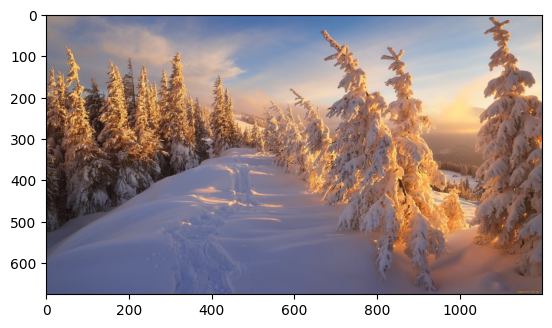

In [2]:
img = cv2.imread("img.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [3]:
img.shape

(676, 1200, 3)

In [4]:
# def RGB2XYZ(img):
#     img = np.array(img)
#     mat = np.array([
#         [0.49, 0.31, 0.2],
#         [0.1769, 0.8120, 0.010],
#         [0.0, 0.01, 0.99]])
#     xyz = np.full(img.shape, 0)
#     for i, row in enumerate(img):
#         for j, pxl in enumerate(row):
#             new_pxl = (1.0/0.1769) * np.dot(mat, img[i, j])
#             xyz[i, j] = new_pxl
#     return xyz

In [5]:
# img_xyz = RGB2XYZ(img)

In [6]:
# изменение насыщенности
# а - положение цвета в диапазоне от зелено-голубого до красно-малинового
# b - положение цвета от голубого до желтого

def lab_change_ab(path_img, c = 1.2):
    img = cv2.imread(path_img, 1)
    imgLAB = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(imgLAB)
    
    for i in range(a.shape[0]):
        for j in range(a.shape[1]):
            a[i, j] = min(a[i, j] * c, 255)

    for i in range(b.shape[0]):
        for j in range(b.shape[1]):
            b[i, j] = min(b[i, j] * c, 255)

    newImgLAB = cv2.merge([l, a, b])
    return cv2.cvtColor(newImgLAB.astype('uint8'), cv2.COLOR_LAB2RGB)

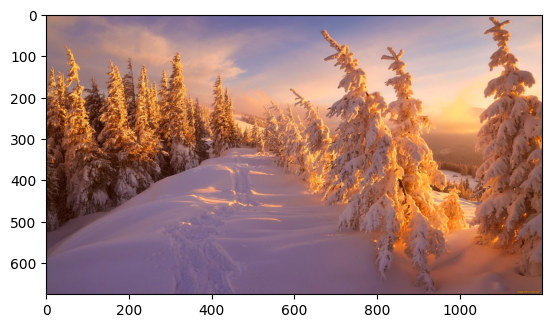

In [7]:
plt.imshow(lab_change_ab("img.jpg", 1.07))

In [8]:
# изменение светлоты (L)

def lab_change_l (path_img, c = 1.2):
    img = cv2.imread(path_img)
    imgLAB = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(imgLAB)
    
    for i in range(l.shape[0]):
        for j in range(l.shape[1]):
            l[i, j] = min(l[i, j] * c, 255)

    newImgLAB = cv2.merge([l, a, b])
    return cv2.cvtColor(newImgLAB.astype('uint8'), cv2.COLOR_LAB2RGB)

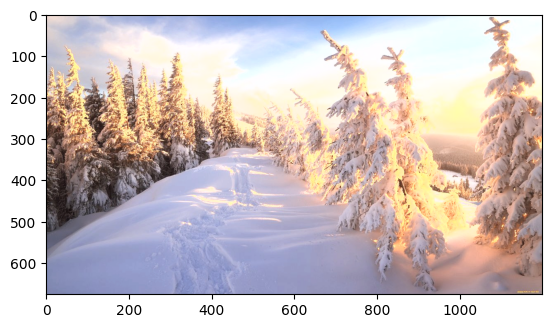

In [9]:
plt.imshow(lab_change_l("img.jpg", 1.5))

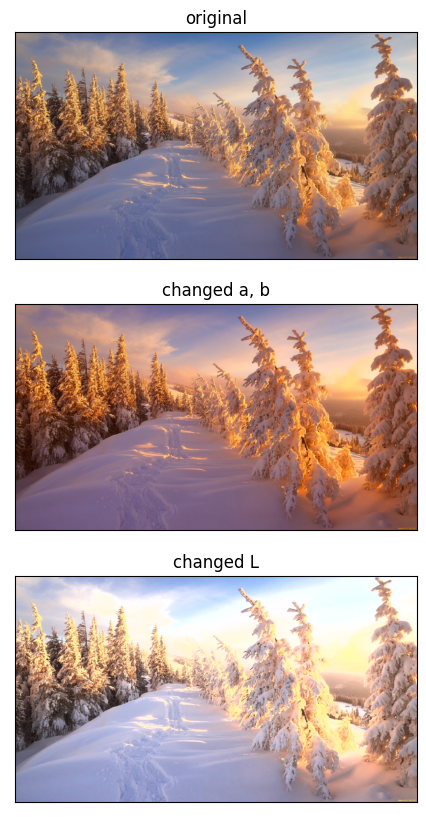

In [10]:
# выведем все результаты
img = cv2.imread("img.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

fig, axs = plt.subplots(3, 1, figsize=(10, 10))
axs[0].imshow(img)
axs[0].set_title("original")
axs[0].get_yaxis().set_visible(False) 
axs[0].get_xaxis().set_visible(False) 

axs[1].imshow(lab_change_ab("img.jpg", 1.07))
axs[1].set_title("changed a, b")
axs[1].get_yaxis().set_visible(False)
axs[1].get_xaxis().set_visible(False)  

axs[2].imshow(lab_change_l("img.jpg", 1.5))
axs[2].set_title("changed L")
axs[2].get_yaxis().set_visible(False) 
axs[2].get_xaxis().set_visible(False) 


# Фильтры

In [11]:
def averaging_blurring(path_img, kernel_size=7):
    img = cv2.imread(path_img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return cv2.blur(img, (kernel_size, kernel_size))

def gaussian_blurring(path_img, kernel_size=7):
    img = cv2.imread(path_img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

def median_blurring(path_img, kernel_size=7):
    img = cv2.imread(path_img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return cv2.medianBlur(img, kernel_size)

def sobel_x(path_img, kernel_size=7):
    img = cv2.imread(path_img, cv2.IMREAD_GRAYSCALE)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=kernel_size)

def sobel_y(path_img, kernel_size=7):
    img = cv2.imread(path_img, cv2.IMREAD_GRAYSCALE)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=kernel_size)

def laplas(path_img):
    img = cv2.imread(path_img, cv2.IMREAD_GRAYSCALE)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return cv2.Laplacian(img, cv2.CV_64F)

def bilateral(path_img, d=15, sigma=75):
    img = cv2.imread(path_img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return cv2.bilateralFilter(img, d, sigma, sigma)

def original(path_img):
    img = cv2.imread(path_img)
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


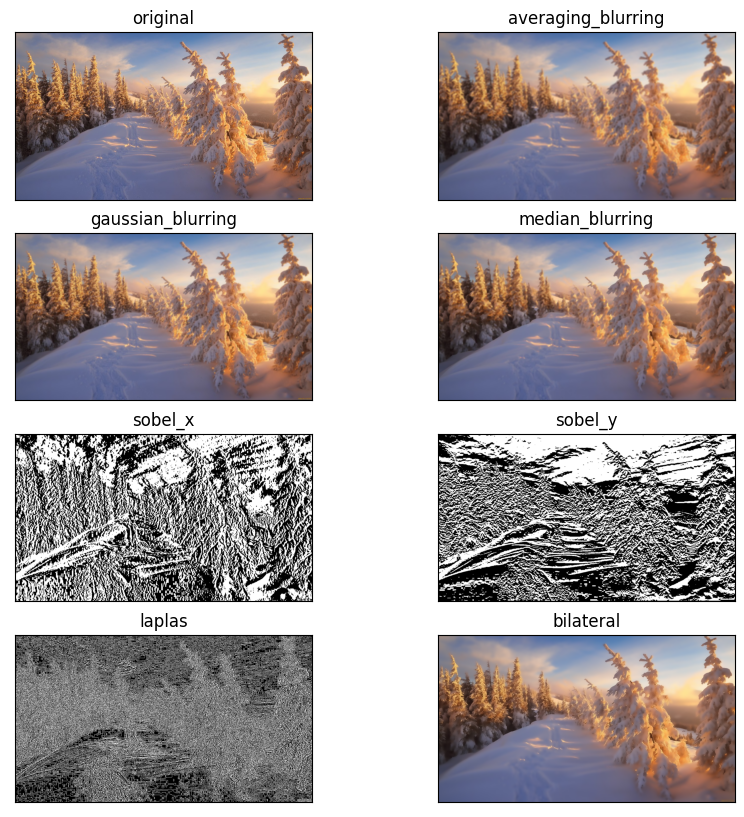

In [12]:
# выведем все результаты
img_path = "img.jpg"
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

fig, axs = plt.subplots(4, 2, figsize=(10, 10))

list_fun = ['original', 'averaging_blurring', 'gaussian_blurring', 'median_blurring',
            'sobel_x', 'sobel_y', 'laplas', 'bilateral']

for i, (ax, name_fun) in enumerate(zip(axs.ravel(), list_fun)):
    ax.imshow(eval(f"{name_fun}(img_path)"))
    ax.set_title(name_fun)
    ax.get_yaxis().set_visible(False)
    ax.get_xaxis().set_visible(False)   


In [13]:
# морфология

# увеличение
def dilation(path_img, kernel_size=3):
    img = cv2.imread(path_img)
    morph_kernel = np.ones((kernel_size, kernel_size))
    dilation = cv2.dilate(img, kernel=morph_kernel, iterations=1)
    return cv2.cvtColor(dilation, cv2.COLOR_BGR2RGB)

# уменьшение
def erode(path_img, kernel_size=3):
    img = cv2.imread(path_img)
    morph_kernel = np.ones((kernel_size, kernel_size))
    erode = cv2.erode(img, kernel=morph_kernel, iterations=1)
    return cv2.cvtColor(erode, cv2.COLOR_BGR2RGB)

# открытие
def open(path_img, kernel_size=3):
    img = cv2.imread(path_img)
    morph_kernel = np.ones((kernel_size, kernel_size))
    open = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel=morph_kernel, iterations=1)
    return cv2.cvtColor(open, cv2.COLOR_BGR2RGB)

#  закрытие
def close(path_img, kernel_size=3):
    img = cv2.imread(path_img)
    morph_kernel = np.ones((kernel_size, kernel_size))
    close = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel=morph_kernel, iterations=1)
    return cv2.cvtColor(close, cv2.COLOR_BGR2RGB)


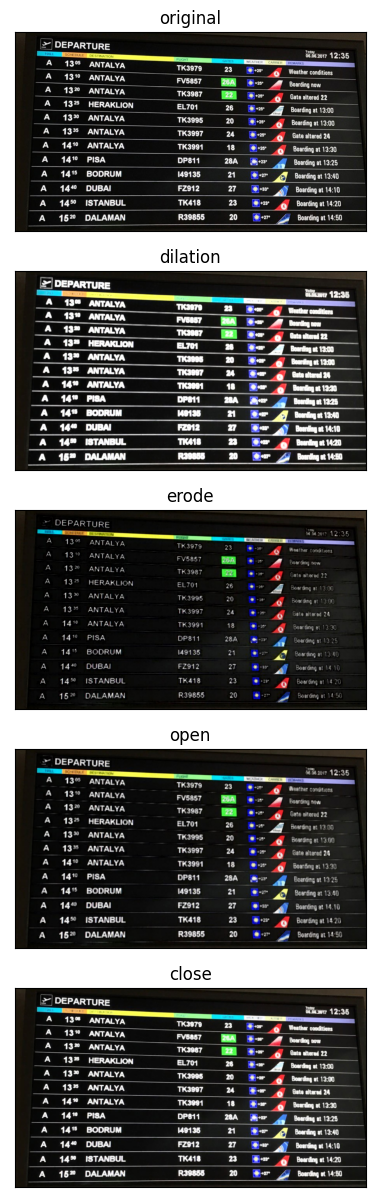

In [14]:
# выведем все результаты
img_path = "tablo.jpg"
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

fig, axs = plt.subplots(5, 1, figsize=(15, 15))

list_fun = ['original', 'dilation', 'erode', 'open', 'close']

for i, (ax, name_fun) in enumerate(zip(axs.ravel(), list_fun)):
    ax.imshow(eval(f"{name_fun}(img_path)"))
    ax.set_title(name_fun)
    ax.get_yaxis().set_visible(False)
    ax.get_xaxis().set_visible(False)   

# Локальное выравнивание гистограммы изображения, переведенного в LAB, по l компоненте

In [34]:
def clahe(path_img, tile_size=(8, 8)):
    img = cv2.imread(path_img)
    imgLAB = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=tile_size)
    l, a, b = cv2.split(imgLAB)
    new_l = clahe.apply(l)

    newImgLAB = cv2.merge([new_l, a, b])

    return cv2.cvtColor(newImgLAB.astype('uint8'), cv2.COLOR_LAB2RGB)

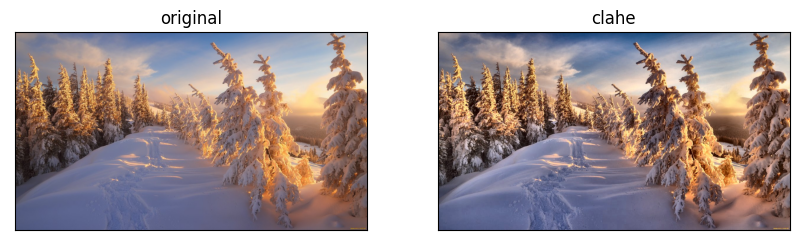

In [37]:
img = cv2.imread("img.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

fig, axs = plt.subplots(1, 2, figsize=(10, 10))
axs[0].imshow(img)
axs[0].set_title("original")
axs[0].get_yaxis().set_visible(False) 
axs[0].get_xaxis().set_visible(False) 

axs[1].imshow(clahe("img.jpg"))
axs[1].set_title("clahe")
axs[1].get_yaxis().set_visible(False)
axs[1].get_xaxis().set_visible(False)  